# CORE TASK 1: No spin coupling

Write a program to construct a lattice and evolve it with time according to the Metropolis‐Hastings algorithm. 

It is probably simplest to parameterise your functions in terms of the dimensionless quantities 𝛽𝐽 and 𝛽𝜇𝐻.

The energy of the 2D Ising system is given by 

$𝐸 = -𝐽 \Sigma_i \Sigma_j 𝑠_i 𝑠_j - 𝜇𝐻 \Sigma_{i=1}^N 𝑠_i$

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [42]:
# Initialise lattice with a w by w grid, where N is the number of spins given by N = w * w
# Here, we initialise with a random spin orientation, where -1 is spin down and 1 is spin up

def initialize_random_lattice(w):
    return np.random.choice([-1, 1], size=(w, w))

def initialise_spinup_lattice(w):
    return np.ones((w, w))

def initialise_spindown_lattice(w):
    return -np.ones((w, w))

# Calculate the energy difference of the lattice using the Ising model defined above
# The energy is given by the sum of the interaction between neighbouring spins and the external magnetic field
# So the energy difference is given by the change in the interaction energy and the change in the external magnetic field energy
# Here, lattice[i, j] means the spin at position (i, j). We sum over all spins and their neighbours. 
# Going clockwise, (i, j-1) is top neighbour, (i+1, j) is right neighbour, , (i, j+1) is bottom neighbour, (i-1, j) is left neighbour
# We include modulo % to ensure periodic boundary conditions

def calculate_energy_difference(lattice, beta_J, beta_muH):
    size = lattice.shape[0]
    for i in range(size):
        for j in range(size):
            beta_delta_energy =  2 * beta_J * lattice[i, j] * (lattice[i, (j-1)%size] + lattice[(i+1)%size, j] + lattice[i, (j+1)%size] + lattice[(i-1)%size, j]) + 2 * beta_muH * lattice[i, j]
    return beta_delta_energy

# maybe instead of [i,j] can put [random_i,ranodom_j] or something...

def spin_flip_metropolis_hastings(lattice, beta_J, beta_muH): #initiate spin flip using metropolis-hastings algorithm
    size = lattice.shape[0]
    for i in range(size):
        for j in range(size):
            beta_delta_energy = calculate_energy_difference(lattice, beta_J, beta_muH)
            if beta_delta_energy <= 0 or np.random.rand() < min(1,np.exp(-beta_delta_energy)):
                lattice[i, j] = -lattice[i, j]
    return lattice #give the new lattice after spin flip

In [70]:
# Need to pick random site to run the algorithm

random_i,random_j = np.random.default_rng().integers(0,w,size=2)
random_i,random_j

(9, 13)

### No Coupling

Set 𝛽𝐽 = 0 so there is no coupling. In such a case, only thermal motion and the external magnetic field affect the flipping of the spins. Do a few simulations with −3 < 𝛽𝜇𝐻 < 3 and observe what happens by plotting the lattice configuration after 1, 10, 100, 1000, 10,000 and (if you have time) 100,000 “time steps” (you can display the lattice configuration using the matplotlib.pyplot.matshow() function). Try both starting with a random lattice and a lattice with all spins in one direction.

#### 𝛽𝐽 = 0 and 𝛽𝜇𝐻 = 0

We try 𝛽𝐽 = 0 and 𝛽𝜇𝐻 = 0 first to test the model

In [48]:
# Set the number of spins and lattice size
w = 50 # lattice size
beta_J = 0 # beta_interaction energy set to zero here
beta_muH = 0 # beta_external magnetic field set to zero here

# Set the number of time steps
time_steps_value = [1, 5, 100]

# Perform simulations for different values of 𝛽𝜇𝐻
beta_muH_values = [0]

Time step: 1 finished simulation.
Time step: 10 finished simulation.
Time step: 50 finished simulation.
Time step: 100 finished simulation.
Time step: 500 finished simulation.


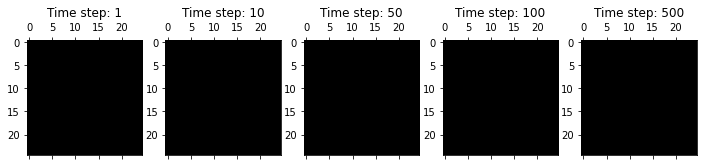

In [49]:
# Perform the simulation of evolution of the lattiuce for different time steps

# Initialise lattice
lattice = initialise_spinup_lattice(w)

# Run the simulation and plot
fig, ax = plt.subplots(1, len(time_steps_value), figsize=(12, 4))
for time_steps in time_steps_value:
    for i in range(time_steps):
        new_lattice = spin_flip_metropolis_hastings(lattice, beta_J, beta_muH)
    plt_index = time_steps_value.index(time_steps)
    ax[plt_index].matshow(new_lattice, cmap='gray')
    ax[plt_index].set_title('Time step: ' + str(time_steps))
    print('Time step: ' + str(time_steps) + ' finished simulation.')

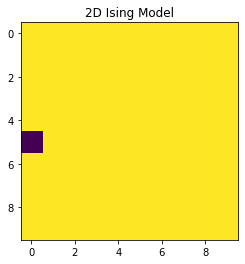

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_system(N):
    return np.ones((N, N))

def calculate_energy(config, i, j, J, h):
    N = len(config)
    neighbors_sum = config[(i + 1) % N, j] + config[i, (j + 1) % N] + config[(i - 1) % N, j] + config[i, (j - 1) % N]
    return 2 * J * (neighbors_sum + h) * config[i, j]

def metropolis_acceptance_probability(delta_E, beta):
    return min(1, np.exp(-beta * delta_E))

def metropolis_hastings_step(config, beta, J, h):
    N = len(config)
    
    # Choose a random site
    i, j = np.random.randint(0, N, size=2)
    
    # Calculate the energy change
    delta_E = calculate_energy(config, i, j, J, h)
    
    # Acceptance probability
    probability_accept = metropolis_acceptance_probability(delta_E, beta)
    
    # Accept or reject the proposed configuration
    if np.random.rand() < probability_accept:
        config[i, j] *= -1  # Flip the spin

    return config

def metropolis_hastings_simulation(N, num_steps, beta, J, h):
    config = initialize_system(N)
    
    for _ in range(num_steps):
        metropolis_hastings_step(config, beta, J, h)

    return config

# Parameters
N = 10  # Size of the lattice
num_steps = 1  # Number of Metropolis steps
beta = 0  # Inverse temperature
J = 0  # Coupling constant
h = 0.0  # External magnetic field

# Run the simulation
final_configuration = metropolis_hastings_simulation(N, num_steps, beta, J, h)

# Plot the final configuration
plt.imshow(final_configuration, cmap='viridis', interpolation='nearest')
plt.title('2D Ising Model')
plt.show()
